In [1]:
import pandas as pd
df = pd.read_csv('MEXICO.csv')
print(df.shape)
print(df.columns)

(26401, 79)
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_a

In [2]:
selcc_variables = ['host_since', 'host_response_time', 'host_is_superhost', 'neighbourhood_cleansed', 'room_type', 'accommodates', 'number_of_reviews', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location']

## Creación de dataframe
df_selecc = df[selcc_variables]
df_selecc

,host_since,host_response_time,host_is_superhost,neighbourhood_cleansed,room_type,accommodates,number_of_reviews,review_scores_cleanliness,review_scores_communication,review_scores_location
0,2010-06-28,NaN,f,Cuajimalpa de Morelos,Entire home/apt,2,0,NaN,NaN,NaN
1,2010-08-09,within an hour,f,Cuauhtémoc,Entire home/apt,14,65,4.70,4.78,4.98
2,2010-10-19,within a few hours,f,Cuauhtémoc,Entire home/apt,2,84,4.88,4.94,4.76
3,2011-01-04,within a few hours,f,Cuauhtémoc,Entire home/apt,4,50,4.76,4.92,4.98
4,2010-08-24,within a few hours,t,Coyoacán,Entire home/apt,2,132,4.96,4.98,4.96
...,...,...,...,...,...,...,...,...,...,...
26396,2018-01-28,within an hour,f,Azcapotzalco,Entire home/apt,6,1,5.00,5.00,4.00
26397,2020-07-24,within an hour,NaN,Benito Juárez,Entire home/apt,2,0,NaN,NaN,NaN
26398,2024-08-04,within an hour,t,Cuauhtémoc,Entire home/apt,4,0,NaN,NaN,NaN
26399,2014-11-25,within an hour,f,Cuauhtémoc,Entire home/apt,2,0,NaN,NaN,NaN


In [3]:
df_selecc.to_csv("MEXICO_LIMPIO_10.csv")

from google.colab import files


files.download("MEXICO_LIMPIO_10.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Carga de archivo
df = pd.read_csv("MEXICO_LIMPIO_10.csv")
df.head(5)

,Unnamed: 0,host_since,host_response_time,host_is_superhost,neighbourhood_cleansed,room_type,accommodates,number_of_reviews,review_scores_cleanliness,review_scores_communication,review_scores_location
0,0,2010-06-28,NaN,f,Cuajimalpa de Morelos,Entire home/apt,2,0,NaN,NaN,NaN
1,1,2010-08-09,within an hour,f,Cuauhtémoc,Entire home/apt,14,65,4.70,4.78,4.98
2,2,2010-10-19,within a few hours,f,Cuauhtémoc,Entire home/apt,2,84,4.88,4.94,4.76
3,3,2011-01-04,within a few hours,f,Cuauhtémoc,Entire home/apt,4,50,4.76,4.92,4.98
4,4,2010-08-24,within a few hours,t,Coyoacán,Entire home/apt,2,132,4.96,4.98,4.96


In [5]:
#Identificar valores nulos por columna
display(df.isnull().sum())

,0
Unnamed: 0,0
host_since,914
host_response_time,4686
host_is_superhost,1359
neighbourhood_cleansed,0
room_type,0
accommodates,0
number_of_reviews,0
review_scores_cleanliness,3375
review_scores_communication,3375


In [6]:
#Establecer un nombre específico "Unknown" a todas los valores nulos dentro de las columnas 'host_since'
df["host_since"] = df["host_since"].fillna("00/00/00")

display(df.isnull().sum())

,0
Unnamed: 0,0
host_since,0
host_response_time,4686
host_is_superhost,1359
neighbourhood_cleansed,0
room_type,0
accommodates,0
number_of_reviews,0
review_scores_cleanliness,3375
review_scores_communication,3375


In [9]:
## LLenamos los NAs de la columna de 'host_response_time' con el string más repetido; "within an hour"
valor_mas_repetido_response = df["host_response_time"].mode()[0]
print("El valor más repetido es:", valor_mas_repetido_response)

df["host_response_time"] = df["host_response_time"].fillna(valor_mas_repetido_response)

display(df.isnull().sum())

El valor más repetido es: within an hour


,0
Unnamed: 0,0
host_since,0
host_response_time,0
host_is_superhost,1359
neighbourhood_cleansed,0
room_type,0
accommodates,0
number_of_reviews,0
review_scores_cleanliness,3375
review_scores_communication,3375


In [10]:
#Agregar nueva categoría 'NONE' a celdas vacias dentro de columna 'host_is_superhost'
df["host_is_superhost"] = df["host_is_superhost"].fillna("NONE")
display(df.isnull().sum())

,0
Unnamed: 0,0
host_since,0
host_response_time,0
host_is_superhost,0
neighbourhood_cleansed,0
room_type,0
accommodates,0
number_of_reviews,0
review_scores_cleanliness,3375
review_scores_communication,3375


In [11]:
#Establecer con 0 todos los values que no cuentan con un review dentro este tipo de variables el dataframe
df['review_scores_cleanliness'] = df['review_scores_cleanliness'].fillna(0)
df['review_scores_communication'] = df['review_scores_communication'].fillna(0)
df['review_scores_location'] = df['review_scores_location'].fillna(0)
display(df.isnull().sum())

,0
Unnamed: 0,0
host_since,0
host_response_time,0
host_is_superhost,0
neighbourhood_cleansed,0
room_type,0
accommodates,0
number_of_reviews,0
review_scores_cleanliness,0
review_scores_communication,0


<Figure size 1500x800 with 0 Axes>

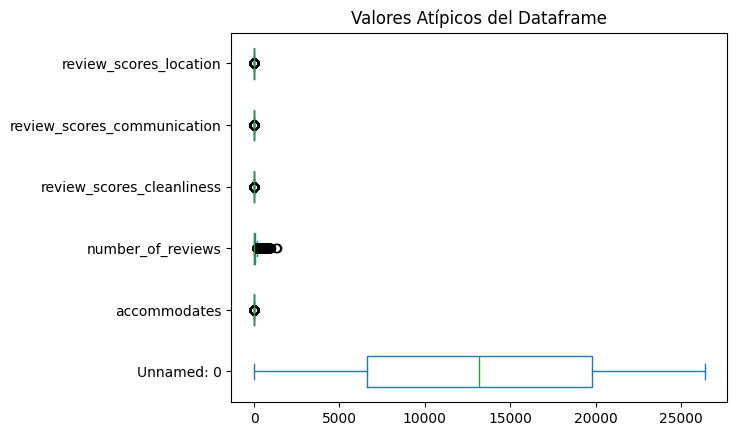

In [13]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
df.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [16]:
# Calculate the first and third quartiles for 'number_of_reviews'
Q1 = df['number_of_reviews'].quantile(0.25)
Q3 = df['number_of_reviews'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and count outliers
outliers = df[(df['number_of_reviews'] < lower_bound) | (df['number_of_reviews'] > upper_bound)]
print(f"Number of outliers in 'number_of_reviews': {len(outliers)}")

# Normalize outliers using the median or capping (using median here as an example)
median_reviews = df['number_of_reviews'].median()
df['number_of_reviews'] = df['number_of_reviews'].apply(lambda x: median_reviews if x < lower_bound or x > upper_bound else x)

# Verify that outliers have been handled
outliers_after_normalization = df[(df['number_of_reviews'] < lower_bound) | (df['number_of_reviews'] > upper_bound)]
print(f"Number of outliers in 'number_of_reviews' after normalization: {len(outliers_after_normalization)}")

# Display the updated dataframe
display(df.head())

Number of outliers in 'number_of_reviews': 2159
Number of outliers in 'number_of_reviews' after normalization: 0


,Unnamed: 0,host_since,host_response_time,host_is_superhost,neighbourhood_cleansed,room_type,accommodates,number_of_reviews,review_scores_cleanliness,review_scores_communication,review_scores_location
0,0,2010-06-28,within an hour,f,Cuajimalpa de Morelos,Entire home/apt,2,0.0,0.00,0.00,0.00
1,1,2010-08-09,within an hour,f,Cuauhtémoc,Entire home/apt,14,65.0,4.70,4.78,4.98
2,2,2010-10-19,within a few hours,f,Cuauhtémoc,Entire home/apt,2,84.0,4.88,4.94,4.76
3,3,2011-01-04,within a few hours,f,Cuauhtémoc,Entire home/apt,4,50.0,4.76,4.92,4.98
4,4,2010-08-24,within a few hours,t,Coyoacán,Entire home/apt,2,132.0,4.96,4.98,4.96


In [19]:
# Calculate the first and third quartiles for 'accommodates'
Q1_acc = df['accommodates'].quantile(0.25)
Q3_acc = df['accommodates'].quantile(0.75)
IQR_acc = Q3_acc - Q1_acc

# Define bounds for outliers for 'accommodates'
lower_bound_acc = Q1_acc - 1.5 * IQR_acc
upper_bound_acc = Q3_acc + 1.5 * IQR_acc

# Identify and count outliers in 'accommodates'
outliers_acc = df[(df['accommodates'] < lower_bound_acc) | (df['accommodates'] > upper_bound_acc)]
print(f"Number of outliers in 'accommodates': {len(outliers_acc)}")

# Normalize outliers in 'accommodates' using the median
median_acc = df['accommodates'].median()
df['accommodates'] = df['accommodates'].apply(lambda x: median_acc if x < lower_bound_acc or x > upper_bound_acc else x)

# Verify that outliers in 'accommodates' have been handled
outliers_after_normalization_acc = df[(df['accommodates'] < lower_bound_acc) | (df['accommodates'] > upper_bound_acc)]
print(f"Number of outliers in 'accommodates' after normalization: {len(outliers_after_normalization_acc)}")

# Display the updated dataframe
display(df.head())

Number of outliers in 'accommodates': 1286
Number of outliers in 'accommodates' after normalization: 0


,Unnamed: 0,host_since,host_response_time,host_is_superhost,neighbourhood_cleansed,room_type,accommodates,number_of_reviews,review_scores_cleanliness,review_scores_communication,review_scores_location
0,0,2010-06-28,within an hour,f,Cuajimalpa de Morelos,Entire home/apt,2.0,0.0,0.00,0.00,0.00
1,1,2010-08-09,within an hour,f,Cuauhtémoc,Entire home/apt,2.0,65.0,4.70,4.78,4.98
2,2,2010-10-19,within a few hours,f,Cuauhtémoc,Entire home/apt,2.0,84.0,4.88,4.94,4.76
3,3,2011-01-04,within a few hours,f,Cuauhtémoc,Entire home/apt,4.0,50.0,4.76,4.92,4.98
4,4,2010-08-24,within a few hours,t,Coyoacán,Entire home/apt,2.0,132.0,4.96,4.98,4.96


In [22]:
df.to_csv("MEXICO_FINAL_LIMPIO.csv")

from google.colab import files


files.download("MEXICO_FINAL_LIMPIO.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>